<a href="https://colab.research.google.com/github/troders34/Machine-Learning/blob/main/Exercise%20to%20make%20a%20Figures%20Classification%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [11]:
!wget --no-check-certificate \
  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2024-06-12 07:37:23--  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip
Resolving dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)... 104.18.42.227, 172.64.145.29, 2606:4700:4400::6812:2ae3, ...
Connecting to dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)|104.18.42.227|:443... connected.
HTTP request sent, awaiting response... 200 OK
Cookie coming from dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com attempted to set domain to digitaloceanspaces.com
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M   208MB/s    in 0.3s    

2024-06-12 07:37:23 (208 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [12]:
# hold an extraction in the zipped-file
import zipfile,os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [13]:
os.listdir('/tmp/images/train')

['clean', 'messy']

In [14]:
os.listdir('/tmp/images/val')

['clean', 'messy']

In [15]:
# create a neat directory in the training data directory
#train_clean_dir = os.path.join(train_dir, 'clean')

# create a messy directory in the training data directory
# validation_clean_dir = os.path.join(train_dir, 'messy')

# create a neat directory in the validation data directory
# validation_clean_dir = os.path.join(validation_dir, 'clean')

# create a messsy directory in the validation data directory
# validation_messy_dir = os.path.join(validation_dir, 'messy')

In [16]:
from types import resolve_bases
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [17]:
train_generator = train_datagen.flow_from_directory(
    train_dir, # directory for training data
    target_size = (150, 150), # change the resolution of all images into 150x150 px
    batch_size = 4,
    # due to an issue of 2 classes classification, use class_mode = 'binary'
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, # directory for validation data
    target_size = (150,150), # change the resolution of all images into 150x150 px
    batch_size = 4,
    # due to the issue of 2 classes classification, use this class_mode = 'binary'
    class_mode = 'binary'
)

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

In [20]:
# compile the model with 'adam' optimizer loss function 'binary_crossentropy'
model.compile(loss = 'binary_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics = ['accuracy'])

In [21]:
# train the model with model.fit
history = model.fit(
      train_generator,
      steps_per_epoch = 25,
      # how many batch will be executed in every epoch?
      epochs = 25,
      # add epoch if the model's accuracy is not optimised yet
      validation_data = validation_generator,
      # show the testing accuracy of the validation data
      validation_steps = 5,
      # how many batch will be executed in every epoch?
      verbose = 2
)

Epoch 1/25
25/25 - 16s - loss: 0.7824 - accuracy: 0.4100 - val_loss: 0.6924 - val_accuracy: 0.5000 - 16s/epoch - 654ms/step
Epoch 2/25
25/25 - 14s - loss: 0.6922 - accuracy: 0.5600 - val_loss: 0.6831 - val_accuracy: 0.5000 - 14s/epoch - 556ms/step
Epoch 3/25
25/25 - 14s - loss: 0.6803 - accuracy: 0.6000 - val_loss: 0.6292 - val_accuracy: 0.6500 - 14s/epoch - 553ms/step
Epoch 4/25
25/25 - 14s - loss: 0.7263 - accuracy: 0.5500 - val_loss: 0.6926 - val_accuracy: 0.5000 - 14s/epoch - 556ms/step
Epoch 5/25
25/25 - 14s - loss: 0.6931 - accuracy: 0.4900 - val_loss: 0.6931 - val_accuracy: 0.5000 - 14s/epoch - 548ms/step
Epoch 6/25
25/25 - 14s - loss: 0.6966 - accuracy: 0.5200 - val_loss: 0.6923 - val_accuracy: 0.5000 - 14s/epoch - 550ms/step
Epoch 7/25
25/25 - 14s - loss: 0.6927 - accuracy: 0.5000 - val_loss: 0.6928 - val_accuracy: 0.5000 - 14s/epoch - 550ms/step
Epoch 8/25
25/25 - 14s - loss: 0.6939 - accuracy: 0.4400 - val_loss: 0.6923 - val_accuracy: 0.5000 - 14s/epoch - 550ms/step
Epoch 9/

Saving a78b5cee98e6a8ba1f539ab43049fdfd.jpg to a78b5cee98e6a8ba1f539ab43049fdfd.jpg
1/1 [==============================] - 0s 292ms/step
a78b5cee98e6a8ba1f539ab43049fdfd.jpg
messy


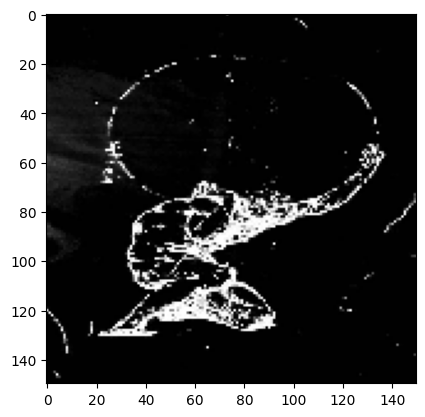

In [25]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes==1:
   print('messy')
  else:
   print('clean')

In [26]:
print(train_generator.class_indices)

{'clean': 0, 'messy': 1}
